<a href="https://colab.research.google.com/github/nstshirotays/Study-AI/blob/master/AI%E5%8B%89%E5%BC%B7%E4%BC%9AV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI勉強会
この勉強会では O'REILLY「ゼロから作る Deep Learning」について解説を行い内容の理解を深めることを目的としている。

## 本日のキーワード
* 活性化関数はリールー
* 出力層はソフトマックス
* 損失関数は交差エントロピー
* 底を見つけるのが勾配降下法
* 学習率は当て推量
* イテレーション数はPDCAの繰り返し回数
* 計算機の能力に合わせて、一回に処理する複数のデータをミニバッチ
* ミニバッチの総和が全量と等しいとき、１エポック

<hr>
学習の準備として下記を実行して下さい


In [0]:
!git clone https://github.com/oreilly-japan/deep-learning-from-scratch.git

Cloning into 'deep-learning-from-scratch'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 414 (delta 1), reused 2 (delta 0), pack-reused 404
Receiving objects: 100% (414/414), 5.51 MiB | 26.49 MiB/s, done.
Resolving deltas: 100% (209/209), done.


# パーセプトロン
ハイ・ローの電気信号による演算を行うCPUの内部構成は、ANDやOR演算を行う論理素子の集合体である。心理学者・計算機科学者のフランク・ローゼンブラットは、人間の脳内でもこのような演算素子と同様のプロセスが、生物学的原理で動作すると想定した。そして実際に回路を作成し画像の学習処理を行った（1957年）

## パーセプトロンの概要


![論理記号](https://docs.google.com/drawings/d/e/2PACX-1vQ2SKuRbOhYXSsd1vbFCWV3iJzEBX2LUoM6QSHY6jpWt1hiOzBMgbzeRm-Pqs5yS-qdAoZBO57Jxr4G/pub?w=390&h=365)

電気回路的な演算素子はそれぞれに実体が異なるが、脳内ではすべて同様の組織体から構成されると想定し、同一の細胞（ニューロン）が外部のコントロールにより様々な２値（真偽値）を出力すると考察し、まずはニューロンを下記のようにモデル化した。

![ニューロンモデル](https://docs.google.com/drawings/d/e/2PACX-1vSinEodXTx3n5L_cMTGqzbDcKC1y6ncEjm0vjk5wHCiDPIT476aqJxuNiiniflzJvy0zjylvyEz0vTP/pub?w=302&h=75)


この円形はニューロンを表す。ニューロンへの入力は矢印で表され、それぞれの入力信号に対して重み付けがされる。これらの情報を元にニューロンYは入力データに重みを乗算した値を閾値θと比較して出力を０か１の二値に振り分ける。これを一般化し下記のような構成にしたものがパーセプトロンである。

![パーセプトロン](https://docs.google.com/drawings/d/e/2PACX-1vSpMVD85wOprci70XqNYFpaA3gNI_rTRVezumjEJ6trAHQ6qMq7gPA-PH7bDzHfOkMb-pEKQXxSOvs_/pub?w=302&h=220)

パーセプトロンでは、複数のニューロンからの入力値（X1、X2、、、）にそれぞれの重み（W1、W2、、、、）を掛けた値を合算し、さらに前述のモデルで閾値θを外部からの入力値として引き出す。これをバイアスと改めて再定義し、それらの総合計がゼロ以下であればゼロを、そうでなければ１を結果として出力するというモデルである。

CPUにおける演算素子はそれぞれ固有のデバイスであるが、このパーセプトロンでは信号の重みであるWとバイアス値であるｂの値を工夫することで、ニューロンの構成を変えずにAND、OR、NANDの演算を行うことができる。

この発見により、神経伝達をそのモデルとしたパーセプトロンはコンピューターのCPUと等価と見なせる事となり、人間の脳活動をコンピューターで摸倣できる可能性が示された。



## ANDパーセプトロンの例
X1とX2のAND（論理積）Yは以下の表の通りとなる。

![真理値（AND)](https://docs.google.com/drawings/d/e/2PACX-1vRBDAVLdjYPZdwKgzW7KjJChXCcVpuf2F4BV37uJsMeq9RiKaEOiBm1ku6IWWPfIIAoYMAsXsFP5y4r/pub?w=110&h=104)

これをパーセプトロンで実現する場合は例として下記のように重みWとバイアスｂを設定する。

![ANDパーセプトロン](https://docs.google.com/drawings/d/e/2PACX-1vS0_fzuAskoeaRAzwEG5YW7YVbXQbVppfbPCA64l-KFjYmMjRuCpsCgvR1Y-k2p24j3Ods_0WE_NumA/pub?w=302&h=220)


実際にpythonで実装を行う。





In [0]:
import numpy as np    # 行列演算の為のライブラリの読み込み

#---------------------------
#  論理積を計算する
#---------------------------
def AND(x1,x2):
  x = np.array([x1,x2])
  w = np.array([0.5,0.5])
  b = -0.7
  result = b + np.sum(w*x)
  if result <= 0:
    return 0
  else:
    return 1
  
print(AND(0,0))
print(AND(0,1))
print(AND(1,0))
print(AND(1,1))


0
0
0
1


## ORパーセプトロン
先程のANDパーセプトロンの重みWとバイアスｂを変更することでor（論理和）パーセプトロンも実装できる。

ORパーセプトロンの真偽値は下記の通り

![ORパーセプトロン](https://docs.google.com/drawings/d/e/2PACX-1vT5n56HwMBreq9nmHCYS3rydXTPR3YQRXs62---PUy9PV6hyP6uSNDVN6A63I-KLN3whl6YPsMwCWYP/pub?w=110&h=104)

これをパーセプトロンで実現する場合は例として下記のように重みWとバイアスｂを設定する。
* W1 = 0.5
* W2 = 0.5
* b = -0.2

これを同様にpythonで実装する



In [0]:
#---------------------------
#  論理和を計算する
#---------------------------
def OR(x1,x2):
  x = np.array([x1,x2])
  w = np.array([0.5,0.5])
  b = -0.2
  result = b + np.sum(w*x)
  if result <= 0:
    return 0
  else:p
    return 1
  
print(OR(0,0))
print(OR(0,1))
print(OR(1,0))
print(OR(1,1))

0
1
1
1


## アルゴリズムとしてのパーセプトロン
上記と同様にNANDなども表現できる。さらにこれらのパーセプトロンを複数組み合わせることもできる。これにより単層では表現できないXORなどの論理演算も可能となる。

最も重要な点は、このパーセプトロンを構成する一つ一つのニューロンは全て等価であり、単に入力値への重み付けが異なるだけという点である。

よってパーセプトロンではこの重みの値を決定することで演算が可能となり、これは演算アルゴリズムをパーセプトロンの重みで表現しているとも言い換えることができる。

これまでのコンピューティングはオブジェクト指向であれなんであれ、実体としては命令を逐次実行することで目的を達成している。AIでは情報を伝達するためのプログラムは存在するが、実際の判定ロジックそのものはこの「重み」が担っている。

ただし単層のパーセプトロンではXOR回路が生成出来ないことが指摘され、多層パーセプトロンが開発されたものの、そのままでは線形分離不可能なパターンを識別できないことが指摘さた。さらに、重みパラメータの設定方法が不明であったことも大きな問題点であった。このためその後10年にわたってこのパーセプトロン理論は日の目を見ることができなかった。





# ニューラルネットワーク
パーセプトロンのコンセプトを元に、これに改良を加えたものがニューラルネットワークである。
* 活性化関数の導入
* ３層構造の導入（出力層の工夫）
* 機械学習(ディープラーニング）の導入



## 活性化関数の導入
パーセプトロンはもともと二値演算を生物学的に実現しようという発想であったため、出力値は当然２値である。これをデジタル（離散値）ではなくアナログ（連続値）にもちこんだのが、このニューラルネットワークの優れた着想点である。

ニューラルネットワークでは、これを活性化関数として再定義している。


主な活性化関数を下記に示す





### ステップ関数
パーセプトロンで実装されている方式。

評価式の結果がゼロ以下かそれ以外で０、１の二値を返す

ステップ関数をグラフに表示する

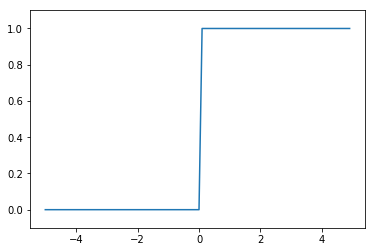

In [0]:
import numpy as np
import matplotlib.pylab as plt

#------------------------
# ステップ関数
#------------------------
def step_function(x):
    return np.array(x > 0, dtype=np.int)

#------------------------
# グラフへの表示
#------------------------
X = np.arange(-5.0, 5.0, 0.1)
Y = step_function(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)  # 図で描画するy軸の範囲を指定
plt.show()

### シグモイド関数
初期のニューラルネットワークで広く用いられた関数。

（城田説）ステップ関数に近い連続的で微分しやすい関数を使ったと思ってる


![シグモイド関数](https://docs.google.com/drawings/d/e/2PACX-1vSPiq7ffbs0PiyFDXrg93J1t3KdMq0eAnCoVC_JfD62LrszzR9t_4c3U76pF_SvNhDCxeKplvJrBIL_/pub?w=182&h=100)

グラフに表示する。


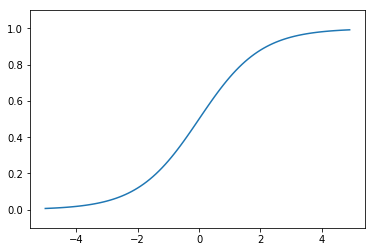

In [0]:
import numpy as np
import matplotlib.pylab as plt

#------------------------
# シグモイド関数
#------------------------
def sigmoid(x):
    return 1 / (1 + np.exp(-x))    

#------------------------
# グラフへの表示
#------------------------
X = np.arange(-5.0, 5.0, 0.1)
Y = sigmoid(X)
plt.plot(X, Y)
plt.ylim(-0.1, 1.1)
plt.show()

上記のようにシグモイド関数では、結果は２値ではなく０から１までの実数が返却される。

これは出力値を２つに限定したパーセプトロンからの大きな飛躍であり、これにより複雑な（曖昧な）入力と出力が可能となった。

### ReLU関数　（別名：ランプ関数　　ramp func 傾斜関数）
最近のAIではシグモイド関数の代わりに用いられる事が多い。

ReLUは入力値がゼロを超えていればそのまま出力される。



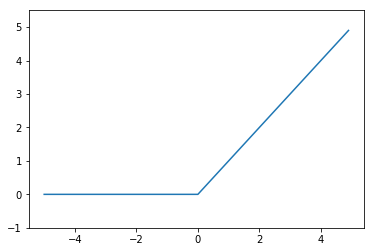

In [0]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt

#------------------------
# ReLU関数
#------------------------
def relu(x):
    return np.maximum(0, x)

#------------------------
# グラフへの表示
#------------------------
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()


## 3層構造の導入
ニューラルネットワークでは、全体のネットワーク構造（ニューロンの繋がり）を入力層、中間層、出力層の３種類で定義している。

下記に３層構造のニューラルネットワークを図示する（入力層が０番目）。

![ニューラルネットワーク図](https://docs.google.com/drawings/d/e/2PACX-1vTz9IG4wquQ4WPAyi6vaxoMVAnO_g1E7lA3We7u1x84faTg_pUQ3KWwEuyP-NDn9YQnPu694SUXM12t/pub?w=960&h=720)



### 入力層
ニューラルネットワークの入力となる層。

各ニューロンへの値は一つなので、画像を認識しようとすれば、各画素毎の値が入力値となる。

具体的には縦横１６ドットの画像であれば、１６×１６＝２５６の画素で構成されるため、入力層のニューロンは２５６個必要となる。

### 隠れ層
この層がAIにおけるモデルの中心部分であり日々進化を遂げている。

過去には計算機のパワー不足により隠れ層が１つでも多大な負荷であったが、現在ではこの隠れ層を数百に及んで実装することも可能となっている。


### 出力層
ニューラルネットワークの出力となる層。この層の設計は説かれる問題によってニューロンの個数と活性化関数が決まってくる（このため、先程の図では出力層での活性化関数がh()ではなくσ()と記述している）。
　　

<table>
  <tr>
    <th>問題の種類</th>
    <th>問題の例</th>
    <th>活性化関数</th>
    <th>出力層の数</th>
  </tr>
  <tr>
    <td>回帰問題</td>
    <td>年齢推定など特定の値を求める</td>
    <td>恒等関数</td>
    <td>1個</td>
  </tr>
  <tr>
    <td>２値分類</td>
    <td>合格・不合格など２種類に分類する</td>
    <td>シグモイド関数</td>
    <td>2個</td>
  </tr>
  <tr>
    <td>多クラス問題</td>
    <td>文字認識など複数のクラスに分解する問題</td>
    <td>ソフトマックス関数</td>
    <td>n個</td>
  </tr>
</table>
</br>


今回の手書き数字認識であれば、結果は０から９のいずれかになるので、出力層は１０となり出力層での活性化関数はソフトマックス関数を用いる。



#### ソフトマックス関数
![ソフトマックス関数](https://docs.google.com/drawings/d/e/2PACX-1vSzbhHIZVMWV4YAJgndvhJuHOmPNSNBJYlKqpLh1d0Ffl6Lfbr9HcQcczLk-oWQgYqcno_Mn6TuFAaM/pub?w=185&h=100)

この関数は出力値を全体の合計値で割ることにより、必ず０～１の間における割合を示す。これは擬似的に出力値に対する期待度、信頼度を示しているとも言える。

なお、expをしていることにより、出力値が高い場合はより大きい値をとることで、微細な違いもはっきりと表示する効果を持っている。



## 手書き数字（エムニスト）認識の実装
それでは、実際にニューラルネットワークを使って手書き文字認識を実装してみる。


### エムニストデータセット
oreillyのデータを使ってMNISTデータの認識を行う

![MNIST](https://docs.google.com/drawings/d/e/2PACX-1vRmKtGjrW_McthMyjLw9dj_zXxKaZ-Gca_HeNPKumeS7EIZ72ndBVYITGC0VLaRQOcayx97xOt_f40n/pub?w=289&h=173)

Mixed Natioal Institute of Standards and Technology database. MNIST [エムニスト] [em-nist]


![サンプル](https://docs.google.com/drawings/d/e/2PACX-1vQkslZu9xyboXsva9jgmQDVrynTZZeYnI6yMamdc012Y3z5kTrA68ePcAyBsagxSfyawIsTHhFE-b7j/pub?w=290&h=318)

* サイズは２８×２８ドット
* 白黒２５６階調（０白：２５５：黒）


### ニューラルネットワークの設計
ここでは隠れ層を２つもつニューラルネットワークを構築する

![代替テキスト](https://docs.google.com/drawings/d/e/2PACX-1vQPJZS9d6upJkCh2yHAc7h5620ZZCjPvGNzHuOTyrXx1kYv8HCC5ORtbB-6FQC-E4oir0peQFe-Q5k9/pub?w=1291&h=743)

* 入力層は２８×２８＝７８４個のニューロン
* 隠れ層１は５０個のニューロン
* 隠れ層２は１００個のニューロン
* 出力層は（正解が0～9なので）１０個のニューロン



In [0]:
%cd /content/deep-learning-from-scratch/ch03

# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax

#-----------------------------
# データの取得
#-----------------------------
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test


#-----------------------------
# 定義済みのニューラルネットワークの読み込み
#-----------------------------
def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


#-----------------------------
# 推論処理
#-----------------------------
def predict(network, x):
    # 重み配列の読み込み
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    # バイアスの読み込み
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    # 入力層　-> 隠れ層1　の処理
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)

    # 隠れ層1　-> 隠れ層2　の処理
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)

    # 隠れ層2　-> 出力層　の処理
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y


#-----------------------------
# メイン処理
#-----------------------------
x, t = get_data()             # 入力データx と正解データt を読み込む
network = init_network()      # 訓練済みの重み、バイアスデータを読み込む
accuracy_cnt = 0

for i in range(len(x)):
    # 一枚ごとに推論処理を行う
    y = predict(network, x[i])
    p= np.argmax(y)           # 最も確率の高い要素のインデックスを取得
    if p == t[i]:
        # 正解の場合
        accuracy_cnt += 1

#-----------------------------
# 結果表示
#-----------------------------
print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

/content/deep-learning-from-scratch/ch03
Accuracy:0.9352


### バッチ処理の実装
上記の例は６万枚の画像データについて一枚づつ処理を行っている。

numpyなどの科学計算ライブラリは行列計算が高速に行えるようにチューニングされている。このため一般的にはロジックでループ処理を行うより、行列式として一度に計算する量を増やしてやるほうが結果として処理が早くなる。

今回の例では一つの画像データ（画素数分の列データ）を複数画像分まとめて（行列データにして）渡すことで、計算が早くなる。

このまとめる指定を「バッチ（束）」と呼ぶ。

バッチ数を指定した場合のプログラムを下記に示す（結果は変わらない）。

In [0]:

x, t = get_data()
network = init_network()

batch_size = 100 # バッチの数
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))


Accuracy:0.9352


# Deep Learning
ディープラーニングとは４層以上のニューラルネットワークにおける各パラメータ（重み、バイアス）を決定する作業である。



## Learning概要
具体的な処理手順をPDCAに例えると、Pとして対象データ郡を抽出し、Dとしてニューラルネットの計算を行う。次にCとして結果の評価を行い、Aとしてパラメータの再設定を行う。これを必要回数分行う。

## P:対象データの抽出-ミニバッチ
ミニバッチとは全量データを使わずに一部のデータをランダムに抜き出すことで処理の高速化を図るテクニックである。これはTV局の視聴率調査と同様の考え方に基づいている。

## D:ニューラルネットの計算
ミニバッチで抽出されたデータを使ってニューラルネットを計算する。これは先に述べたように、中間層の活性化関数をシグモイド関数とし、出力層ではそれをソフトマックスにより確率として計算される。

## C:チェック：損失関数の設定
ソフトマックスにより計算された値がどの程度正解からズレているか（誤差）を計算する。この関数を損失関数と呼ぶ。

損失関数は誤差を数値化することである。数学的に最も有名な誤差計測の方法は２乗和誤差と呼ばれるものであるが、AIの世界では交差エントロピー誤差という手法が利用される。


<hr>

### 交差エントロピー誤差
![交差エントロピー誤差](https://docs.google.com/drawings/d/e/2PACX-1vRkLbMfJmj-vUDumOXr1Lxk32H9Hu7CNryVJWggm48BZmN8pMkEfX94XdkzyaAiggbWiqrBRTdteCBv/pub?w=150&h=100)

　先のmnistデータでは、各画像に対する正解データ（教師データ）は０から９までの配列で表されていた。  
　一方、ニューラルネットワークを使って計算された出力結果はソフトマックス関数により０から１までの値として表現される。  
　この例で交差エントロピー誤差を計算すると、教師データは正解以外はゼロであるため、結局の所　E=log(0.8)を計算するだけでよい。
 
<table>
  <tr>
    <th>ラベル</th>
    <th>0</th>
    <th>1</th>
    <th>2</th>
    <th>3</th>
    <th>4</th>
    <th>5</th>
    <th>6</th>
    <th>7</th>
    <th>8</th>
    <th>9</th>
  </tr>
  <tr>
    <th>正解データ</th>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>1</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
  </tr>
  <tr>
    <th>SoftMax出力値</th>
    <td>0</td>
    <td>0.1</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0.8</td>
    <td>0</td>
    <td>0</td>
    <td>0.1</td>
    <td>0</td>
  </tr>
  <tr>
    <th>交差エントロピー誤差</th>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0.22</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
    <td>0</td>
  </tr>
</table>



ちなみに、y = log(x)のグラフは

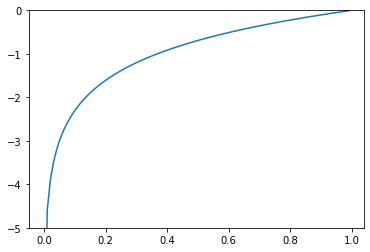

In [0]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt
#------------------------
# グラフ表示
#------------------------
x = np.arange(0.0001, 1.0, 0.01)
y = np.log(x)
plt.plot(x, y)
plt.ylim(-5.0, 0.0)
plt.show()

となり、Xが１のときにYは０となる。なお、Xが０となるとlog(x)は-∞となるため、プログラミングする際はXがゼロとならないように極小のバイアス値を付加して算出する。


## A:パラメーターの再計算
先に導出された損失関数を指標に各パラメーター（重みとバイアス）を決定してゆく。

この値の決定方法として勾配降下法と呼ばれる手法が用いられる。

### 勾配降下法

まず一つのニューロンの重みWについて考えてみる。この重みを横軸にとり、縦軸に損失関数を表示した場合は下記のような図になるだろう。下図の曲線はデタラメであるものの、実際の値はもっと複雑なグラフにもなることであろう。


![勾配降下法](https://docs.google.com/drawings/d/e/2PACX-1vRN5EFodaLfgY0qFOPS9jQLNnJFa-e5JnrwZBAEAVqAtdxPtdnFIhW3xN0176LokS0BbOm3IsdLmCVn/pub?w=791&h=386)

ここでのポイントは、現時点でPで示される重みをどのように変化させたら損失関数の値が一番減るのだろうかという問題である。答えとしては点Pを増大させればよいことが、グラフを見ればすぐに分かる。

これを数学的に置き換えるならば、**「傾きを下る」方向に値を調整する** という回答になる。


この傾きを求めるには　点Pの前後のウェイト値を使って再度損失関数の値を求め、その差を使って傾きを求める方法がある。これを**数値微分**と呼ぶ。



### 勾配降下法の例題
実際に数値微分を使って勾配降下法の動きを見てみる。

例として　　f(x1,x2) = x1^2 + x2^2 としたとき、関数fが最小の値となるx1,x2を求める。




/content/deep-learning-from-scratch/ch04


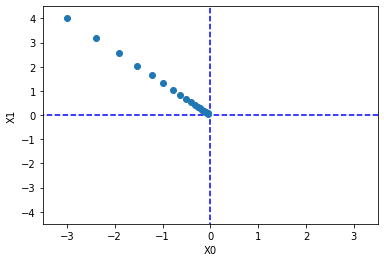

In [0]:
%cd /content/deep-learning-from-scratch/ch04

# coding: utf-8
import numpy as np
import matplotlib.pylab as plt
from gradient_2d import numerical_gradient


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)


def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1               # Learning Rate 学習率
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()


### 学習率(Learning Rate)η
ここで重要なパラメータとして「学習率η（イータ）」がある。この学習率は傾きに乗じる定数であるが、これが大きすぎても小さすぎても正しい値を導くことができない。

* lr=0.1であれば収束する
* lr=0.01では収束しない
* 逆にlr=0.8であると発散してしまう

なお、この学習率は経験的に発見するしかない。


## Learningの実装
これまでの説明でPDCAを見てきた。ここで実際にプログラムとしてニューラルネットワークの学習を実装する。

### 回数に関する用語

PDCAの繰り返し回数を　**イテレーション数**と呼ぶ。


対象としている訓練データの総数を１エポックという単位で表す。これはPDCAがミニバッチによりランダムに選ばれたデータで訓練をされるため、実際には全部のデータを処理したことにはならないが、便宜的に１エポックで一回りの学習をしたとみなすためである。

/content/deep-learning-from-scratch/ch04
train acc, test acc | 0.09736666666666667, 0.0982
train acc, test acc | 0.7874833333333333, 0.7906
train acc, test acc | 0.87525, 0.8792
train acc, test acc | 0.8983, 0.8996
train acc, test acc | 0.9071666666666667, 0.9111
train acc, test acc | 0.9129, 0.9165
train acc, test acc | 0.9191, 0.9206
train acc, test acc | 0.9233, 0.9255
train acc, test acc | 0.9266333333333333, 0.9271
train acc, test acc | 0.92985, 0.9316
train acc, test acc | 0.93195, 0.9332
train acc, test acc | 0.9353333333333333, 0.9371
train acc, test acc | 0.9381, 0.9379
train acc, test acc | 0.9402666666666667, 0.9393
train acc, test acc | 0.94175, 0.9405
train acc, test acc | 0.9445833333333333, 0.9428
train acc, test acc | 0.9460666666666666, 0.9437


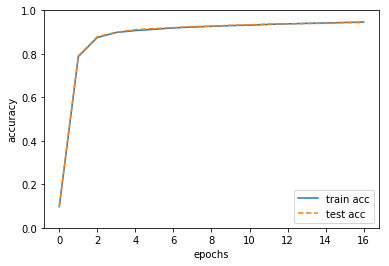

In [0]:
%cd /content/deep-learning-from-scratch/ch04


# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# 誤差逆伝播法（バックプロパゲーション）
　先程の機械学習では数値微分という方法で重みを計算したが、CPU処理量が多いため多層ネットワークの構築には不向きである。このため、計算が高速となる誤差逆伝播法（バックプロパゲーション）が開発された。  
　多層に渡った活性化関数を微分するためには、連鎖率を利用して損失関数の値から逆向きに偏微分してゆくことで高速に計算できる。ここではそれを計算グラフにて説明する。

## 計算グラフ
　計算グラフという記法を使い、順方向の計算を確認する

![計算グラフ](https://docs.google.com/drawings/d/e/2PACX-1vTwwOt7w-NMp-xaUtPVC7ItTlS5IWqvm0IGxWJAQuWD1WSDNrJdowzxfQ9ED53x05uX26WEmkQjt6BL/pub?w=813&h=521)


　この計算グラフを使ってリンゴの値段に関する合計金額の微分を求める。つまりリンゴ１個の値段が与える合計金額への影響度は下図のように示される。


![代替テキスト](https://docs.google.com/drawings/d/e/2PACX-1vQRRJ8owch1DvuUawwqgJ_hLX61YB5Lyt4exjIwP6bNnlPawfjN12X2ngO3l0N_9RJ7OKtTBlJ4YBuF/pub?w=809&h=521)

上記のように、乗算ノードでは互いの数値を互い違いに掛け算し、加算ノードでは前段の値をそのまま使いながら逆の方向に計算を行うと、最終的に微分値が決定される。これが逆伝播法である。ポイントは以下の通り。

* 偏微分値は出力側から逆順に計算してゆくことができる
* 計算は各ノードの値のみを使えば良い




## ReLUレイヤの実装

![代替テキスト](https://docs.google.com/drawings/d/e/2PACX-1vSvgNlyRTv8kiaVrxEk4MNumcGohtSS7DDfTkPpTAAUT-I0Ecjhi62dDU8RWQRIlz7eL4XBW2HoAP2g/pub?w=958&h=247)

活性化関数ReLUの場合は入力値が０より大きい場合は、その値がそのまま渡される。このため、グラフの傾きすなわち微分値は１であり、逆伝播においては渡された値に１を掛けた値としてそのまま逆伝播させる。


pythonでの実装としては、下記のようになる。


In [0]:
# coding: utf-8
import numpy as np
from common.functions import *
from common.util import im2col, col2im


class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0  

        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx


# ReLUレイヤーのコーディングサンプル
x = np.array([[1.0,-1.2],[-2.2,1.3]])
print("----------------")
print("もともとの入力値")
print(x)
print("----------------")
print("mask=(x<=0)   マスク値  ")
mask=(x<=0)
print(mask)
print("----------------")
print("x[mask]=0      Trueの部分をゼロで埋める")
x[mask]=0
print(x)

----------------
もともとの入力値
[[ 1.  -1.2]
 [-2.2  1.3]]
----------------
mask=(x<=0)   マスク値  
[[False  True]
 [ True False]]
----------------
x[mask]=0      Trueの部分をゼロで埋める
[[1.  0. ]
 [0.  1.3]]


## シグモイドレイヤの実装

今回のMNSITデータ分析では利用しないが、シグモイド関数の逆伝播について記述する


![シグモイド関数](https://docs.google.com/drawings/d/e/2PACX-1vSPiq7ffbs0PiyFDXrg93J1t3KdMq0eAnCoVC_JfD62LrszzR9t_4c3U76pF_SvNhDCxeKplvJrBIL_/pub?w=182&h=100)

シグモイド関数の微分を計算グラフで解くと最終的に下記のようになる。


![代替テキスト](https://docs.google.com/drawings/d/e/2PACX-1vQbSo7K6xNPYZ6uZsEVr25lCTd-IyL_CvHxUBz_qnTGHR6_9ccFON4N9tWrGwZwPsJJJwKhqVtOu9yE/pub?w=476&h=224)


実装としては下記の通り
```
class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = sigmoid(x)
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx

```




## Affineレイヤの実装

各ニューロンは複数からの信号と重み付けを受け取りそれらの総和を活性化関数に引き渡している。

![パーセプトロン](https://docs.google.com/drawings/d/e/2PACX-1vSpMVD85wOprci70XqNYFpaA3gNI_rTRVezumjEJ6trAHQ6qMq7gPA-PH7bDzHfOkMb-pEKQXxSOvs_/pub?w=302&h=220)

先程はこの活性化関数を一つのレイヤとして実装した。Affineレイヤはその前段として、各ノードからの値と重みを掛け合わせ、バイアスを付加する部分を受け持つ。


* affineとは幾何学における写像を意味する。

```
class Affine:
    def __init__(self, W, b):
        self.W =W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None

    def forward(self, x):
        self.x = x
        out = np.dot(self.x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        
        return dx

```




## Softmax with Lossレイヤの実装
ニューラルネットワークの最終段階としてソフトマックス関数による確信度の計算とそれを評価する損失関数のレイヤを同時に定義する。なお、ここでは損失関数を交差エントロピーとしている。


```
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None # softmaxの出力
        self.t = None # 教師データ

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size: # 教師データがone-hot-vectorの場合
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        
        return dx
```




## 全体実装

![代替テキスト](https://docs.google.com/drawings/d/e/2PACX-1vRz5JqHaZeJ2QZy31JlNOiROYOsYd5q1nZ29G79UH3MEM0cAN9zn_v717IeMl0_rUXsw82679O8aEmk/pub?w=599&h=413)

隠れ層を５０とした２層のニューラルネットワークを実装する

In [0]:
%cd /content/deep-learning-from-scratch/ch04

# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict


class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std = 0.01):
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros(output_size)

        # レイヤの生成
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()
        
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        
        return x
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.lastLayer.backward(dout)
        
        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W2'], grads['b2'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads


/content/deep-learning-from-scratch/ch04


In [0]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)

import numpy as np
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # 更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)


Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
0.11236666666666667 0.1135
0.7669833333333334 0.7718
0.8752666666666666 0.8815
0.89825 0.9019
0.9079833333333334 0.9109
0.9144166666666667 0.917
0.9195166666666666 0.9221
0.9234166666666667 0.9251
0.92685 0.9282
0.9301166666666667 0.9301
0.9328166666666666 0.9335
0.9352333333333334 0.9345
0.9370666666666667 0.9368
0.9393333333333334 0.9387
0.9416166666666667 0.9405
0.943 0.9426
0.9447 0.9428


# 実装上の課題
これまでのところで大まかなAIの仕組みについて学習を行った。ここではAIを実際に実装する場合に問題となる諸課題について概覧する

## 勾配降下法の問題点

勾配降下法によって最も損失関数が小さくなる値を求める場合、問題としてはその出発点によっては目標の最小値にたどり着けない点である。

![代替テキスト](https://docs.google.com/drawings/d/e/2PACX-1vQhdzzAYjQ8Uxgs4-7bZ1soV_wPt1M47ll436PPh2y6d-rOE9cU4voWgVO9QcMIFCq5V6-OV9D7DWbf/pub?w=791&h=386)

### SGD(確率的勾配降下法）
先に実装した例は確率的勾配降下法と呼ばれる手法である。これは全体の中の一部をランダムに選び出すことで、計算の起点となる点Pの位置を変えることで、確率的に目標の近辺からスタートさせる事を目標としている。




#### 標準的な探索方法

基本的には微分値がマイナスとなる方向に予め定められた量を移動させることで、最適解を探索する。

![代替テキスト](https://docs.google.com/drawings/d/e/2PACX-1vRwN3IoFQ1PPyVor6NoQbXQohRqEc9S1SRLO7zHR2KbbgxkR7EpC-GUqUzKazvEsrUhJ3dH6M3Gb3Ze/pub?w=791&h=386)

この予め定めらた量は学習率（Learning Rate）ηで示される。この学習率の設定は経験的に定められる。上図の場合では学習率が大きいため、一旦かなり最適解に近づくものの、その次では最適解を通り越してしまい、いわゆる振り子状態が長く続く点が問題となる。

#### Momentumによる探索
これは常にひつ前の移動量を保存しておき、その前回移動量の一定割合をマイナスに作用させる探索方法であり、これにより見かけ上は慣性的な力が加わることで、自由振り子状態を緩和させることができる。

#### AdaGrad
これは各学習段階の履歴を保存し、過去の学習量に比例して移動量を減らしてゆく手法である。

#### Adam
Momentum + AdaGradによる探索法



## 重みの初期値
例題では重みの初期値はガウス分布を用いたが、代表的な初期値は２つ。

### Xaivierの初期値
　Xaivierの初期値は様々なニューラルネットで用いられている。sigmoid関数やtanh関数を活性化関数として用いる時、このXavierの初期値を用いるとよい。

### Heの初期値
　Heの初期値はReLU関数を活性化関数とするときに用いるとよい。ReLU関数を活性化関数としたモデルにXavierの初期値を用いるとアクティベーション分布に偏りが生じやすくなることが知られている。




## Batch Normalization
![代替テキスト](https://docs.google.com/drawings/d/e/2PACX-1vSa-QlDlMx_WFHsisso0ulsManhVjcWxVxWfbZtlVesNnlaSnlK2gOyLk-dS8DPbWuHMMUexEWTwhqL/pub?w=397&h=206)

これはミニバッチ単位に入力データの値を平均がゼロ、分散が１となるように統計的に調整するレイヤーを挟み込むことで下記のような効果が得られる。
* 学習が早く進む
* 初期パラメータへの依存度が下がる
* 過学習を抑制できる



## 過学習への対応
　過学習とは訓練データにフィットしすぎて未知データに対してはかえって認識率が低くなる状態をさす。この過学習を防ぐための仕組みとしてWeight DecayとDropoutについて述べる

### Weight Decay
　過学習の原因として重みの値が極端に大きくなる事が知られており、これに対応するほうほうとして構築された手法。  
　損失関数に重みWを要素とした値を加えることで、大きな重みが損失を大きくするように調整する。

### Drop Out

![代替テキスト](https://docs.google.com/drawings/d/e/2PACX-1vRhsO9inUmkCqld72pxTJNfqejbccG7V0WeBBZq-TmtrEWpv_shAhVb_O-8KbRPD0FXDwxX99iIBhYj/pub?w=595&h=229)

　途中のニューロンをミニバッチ毎にランダムに間引くことで、信号の経路を複数パターンで学習させる。その際に飛ばされたニューロンを代替するニューロンは余計に信号を学習する？　ことで全体の効率が上がる？　らしい。


